# Notebook to train the AI models used for NB03

In [1]:
import numpy as np

from tqdm import trange
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

%matplotlib inline

In [2]:
def load_dataset(path):
    dataset = np.load(path)
    traces = dataset["trace"]
    labels = dataset["sensitive_data"]

    return traces, labels

In [3]:
path = "./dataset_dl.npy"

traces, labels = load_dataset(path)

In [4]:
print(traces.shape)
print(labels.shape)

print(traces)
print(labels)

(9900, 700)
(9900, 16)
[[ 0.17089844  0.16113281  0.17773438 ... -0.13183594 -0.1015625
  -0.07617188]
 [ 0.16992188  0.16308594  0.17773438 ... -0.13085938 -0.10253906
  -0.07617188]
 [ 0.16992188  0.16113281  0.17675781 ... -0.12988281 -0.09960938
  -0.07519531]
 ...
 [ 0.17089844  0.16210938  0.18066406 ... -0.13378906 -0.1015625
  -0.078125  ]
 [ 0.171875    0.16210938  0.18066406 ... -0.13085938 -0.10058594
  -0.078125  ]
 [ 0.17089844  0.16113281  0.17871094 ... -0.13183594 -0.09960938
  -0.07714844]]
[[ 49. 200.  29. ... 147.  95.  69.]
 [153. 133. 153. ...  29. 208.  89.]
 [187. 147. 220. ... 197. 168. 217.]
 ...
 [193. 234. 178. ... 184. 145.  76.]
 [ 86.  53. 189. ... 176.  50. 172.]
 [ 90.  10. 219. ...  88. 255. 175.]]


In [5]:
# Define the MLP model
def build_mlp(classes=256,input_dim=700):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))   
    model.add(Dense(classes, activation='softmax')) 
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0034 - loss: 5.5449 - val_accuracy: 0.0040 - val_loss: 5.5448
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0058 - loss: 5.5404 - val_accuracy: 0.0030 - val_loss: 5.5446
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0104 - loss: 5.5344 - val_accuracy: 0.0030 - val_loss: 5.5437
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0121 - loss: 5.5203 - val_accuracy: 0.0051 - val_loss: 5.5385
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0125 - loss: 5.4693 - val_accuracy: 0.0071 - val_loss: 5.5108
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0112 - loss: 5.2976 - val_accuracy: 0.0232 - val_loss: 5.3740
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0162 - loss: 5.0001 - val_accuracy: 0.0172 - val_loss: 5.1737
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0392 - loss: 4.6979 - val_accuracy: 0.0242 - val_loss:

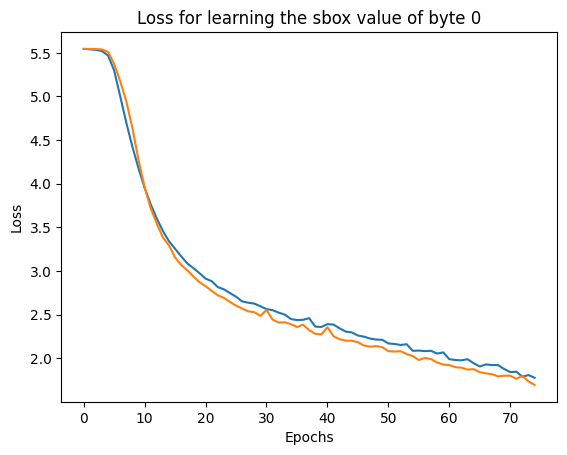

  6%|▋         | 1/16 [00:15<03:52, 15.52s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0044 - loss: 5.5452 - val_accuracy: 0.0020 - val_loss: 5.5449
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0051 - loss: 5.5410 - val_accuracy: 0.0061 - val_loss: 5.5448
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0067 - loss: 5.5357 - val_accuracy: 0.0071 - val_loss: 5.5439
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0105 - loss: 5.5246 - val_accuracy: 0.0061 - val_loss: 5.5399
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0146 - loss: 5.4897 - val_accuracy: 0.0091 - val_loss: 5.5200
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0141 - loss: 5.3544 - val_accuracy: 0.0152 - val_loss: 5.4350
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0153 - loss: 5.0963 - val_accuracy: 0.0212 - val_loss: 5.2745
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0256 - loss: 4.8549 - val_accuracy: 0.0172 - val_loss:

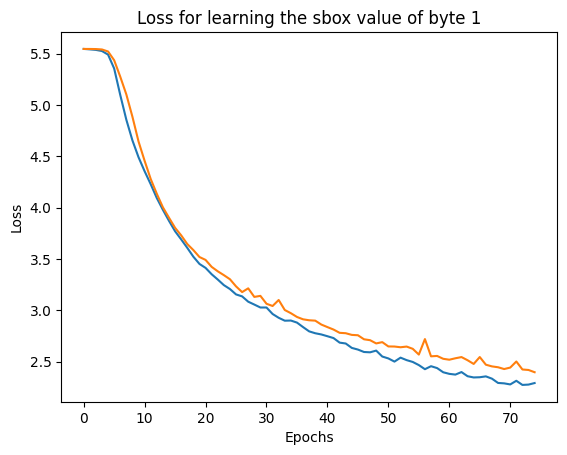

 12%|█▎        | 2/16 [00:31<03:39, 15.70s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0040 - loss: 5.5453 - val_accuracy: 0.0051 - val_loss: 5.5457
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0046 - loss: 5.5406 - val_accuracy: 0.0040 - val_loss: 5.5458
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0063 - loss: 5.5347 - val_accuracy: 0.0020 - val_loss: 5.5454
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0111 - loss: 5.5222 - val_accuracy: 0.0131 - val_loss: 5.5421
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0132 - loss: 5.4805 - val_accuracy: 0.0121 - val_loss: 5.5225
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0159 - loss: 5.3218 - val_accuracy: 0.0263 - val_loss: 5.4290
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0224 - loss: 5.0216 - val_accuracy: 0.0172 - val_loss: 5.2338
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0371 - loss: 4.7183 - val_accuracy: 0.0101 - val_loss:

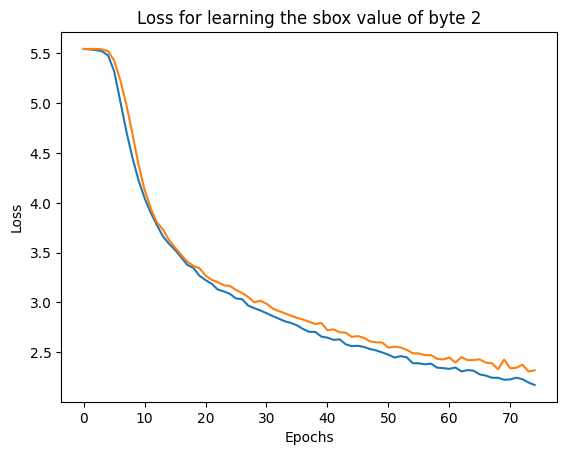

 19%|█▉        | 3/16 [00:47<03:24, 15.71s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0044 - loss: 5.5459 - val_accuracy: 0.0040 - val_loss: 5.5448
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0070 - loss: 5.5418 - val_accuracy: 0.0030 - val_loss: 5.5447
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0111 - loss: 5.5375 - val_accuracy: 0.0030 - val_loss: 5.5443
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0135 - loss: 5.5306 - val_accuracy: 0.0020 - val_loss: 5.5428
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0160 - loss: 5.5151 - val_accuracy: 0.0071 - val_loss: 5.5361
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0186 - loss: 5.4629 - val_accuracy: 0.0131 - val_loss: 5.5003
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0192 - loss: 5.2729 - val_accuracy: 0.0141 - val_loss: 5.3622
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0232 - loss: 4.9668 - val_accuracy: 0.0222 - val_loss:

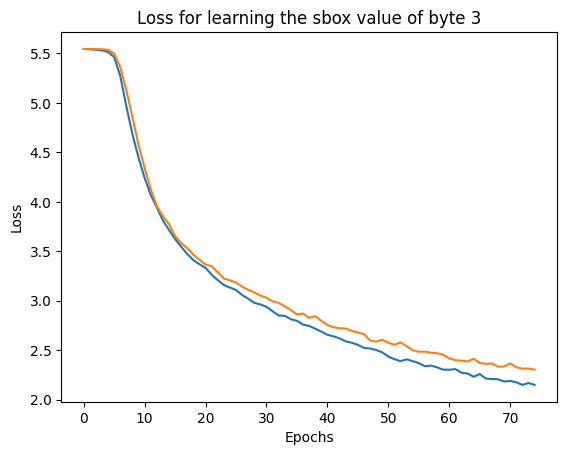

 25%|██▌       | 4/16 [01:02<03:07, 15.60s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0038 - loss: 5.5448 - val_accuracy: 0.0081 - val_loss: 5.5454
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0051 - loss: 5.5404 - val_accuracy: 0.0071 - val_loss: 5.5452
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0081 - loss: 5.5346 - val_accuracy: 0.0081 - val_loss: 5.5444
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0101 - loss: 5.5219 - val_accuracy: 0.0010 - val_loss: 5.5409
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0139 - loss: 5.4791 - val_accuracy: 0.0010 - val_loss: 5.5206
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0203 - loss: 5.3139 - val_accuracy: 0.0101 - val_loss: 5.4227
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0222 - loss: 5.0213 - val_accuracy: 0.0101 - val_loss: 5.2421
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0385 - loss: 4.7457 - val_accuracy: 0.0172 - val_loss:

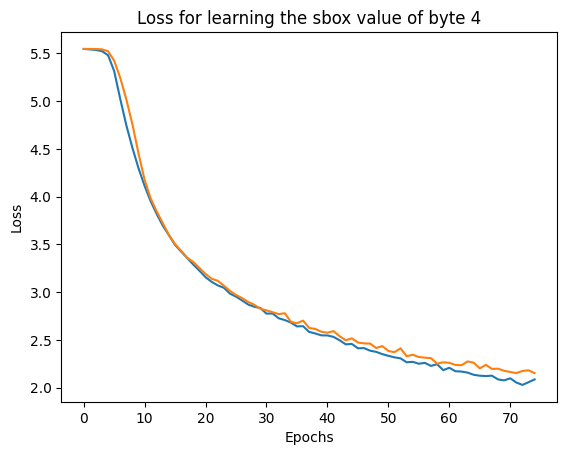

 31%|███▏      | 5/16 [01:18<02:51, 15.58s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0043 - loss: 5.5453 - val_accuracy: 0.0020 - val_loss: 5.5444
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0064 - loss: 5.5409 - val_accuracy: 0.0020 - val_loss: 5.5445
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0079 - loss: 5.5348 - val_accuracy: 0.0040 - val_loss: 5.5440
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0111 - loss: 5.5190 - val_accuracy: 0.0040 - val_loss: 5.5399
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0119 - loss: 5.4562 - val_accuracy: 0.0051 - val_loss: 5.5112
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0105 - loss: 5.2568 - val_accuracy: 0.0141 - val_loss: 5.3921
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0185 - loss: 4.9978 - val_accuracy: 0.0192 - val_loss: 5.2299
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0281 - loss: 4.7733 - val_accuracy: 0.0141 - val_loss:

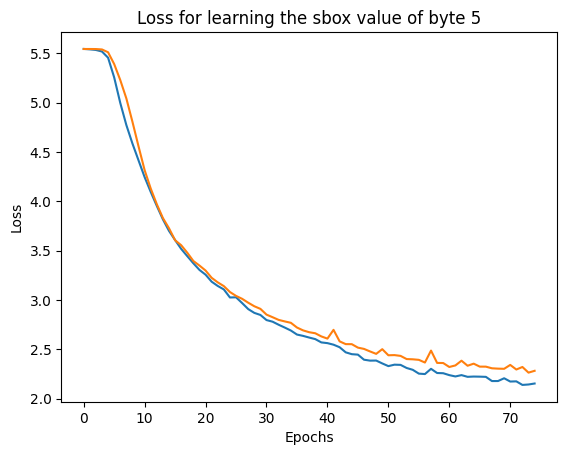

 38%|███▊      | 6/16 [01:34<02:37, 15.73s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0040 - loss: 5.5450 - val_accuracy: 0.0051 - val_loss: 5.5449
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0066 - loss: 5.5403 - val_accuracy: 0.0040 - val_loss: 5.5445
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0080 - loss: 5.5340 - val_accuracy: 0.0051 - val_loss: 5.5436
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0147 - loss: 5.5215 - val_accuracy: 0.0061 - val_loss: 5.5397
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0195 - loss: 5.4818 - val_accuracy: 0.0081 - val_loss: 5.5188
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0150 - loss: 5.3230 - val_accuracy: 0.0091 - val_loss: 5.4212
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0218 - loss: 5.0204 - val_accuracy: 0.0172 - val_loss: 5.2278
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0405 - loss: 4.7234 - val_accuracy: 0.0242 - val_loss:

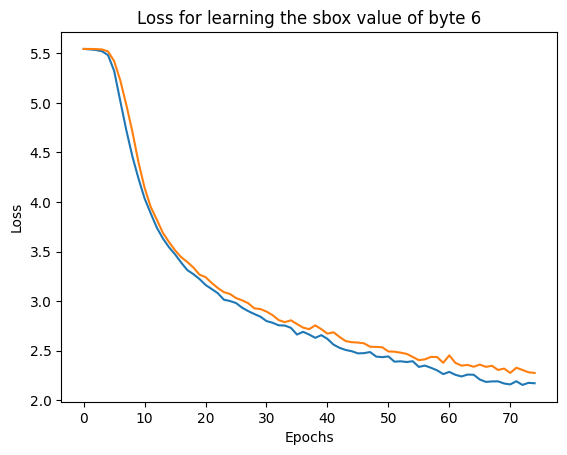

 44%|████▍     | 7/16 [01:49<02:21, 15.69s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0037 - loss: 5.5442 - val_accuracy: 0.0010 - val_loss: 5.5452
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0047 - loss: 5.5386 - val_accuracy: 0.0040 - val_loss: 5.5450
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 5.5296 - val_accuracy: 0.0071 - val_loss: 5.5438
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0144 - loss: 5.5060 - val_accuracy: 0.0030 - val_loss: 5.5374
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0132 - loss: 5.4235 - val_accuracy: 0.0081 - val_loss: 5.5025
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0118 - loss: 5.2016 - val_accuracy: 0.0091 - val_loss: 5.3769
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0202 - loss: 4.9447 - val_accuracy: 0.0101 - val_loss: 5.2187
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0294 - loss: 4.7271 - val_accuracy: 0.0121 - val_loss:

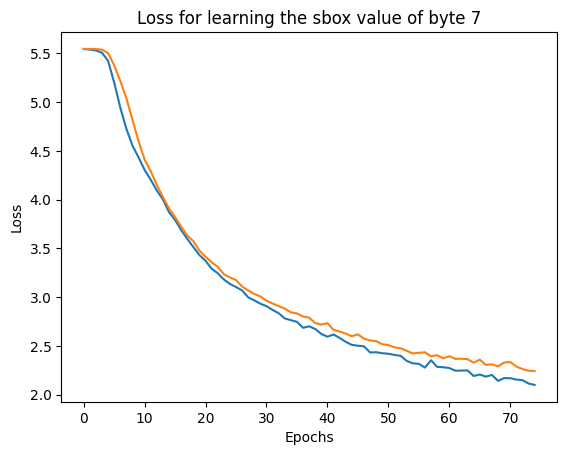

 50%|█████     | 8/16 [02:05<02:05, 15.67s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0044 - loss: 5.5451 - val_accuracy: 0.0040 - val_loss: 5.5453
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0071 - loss: 5.5404 - val_accuracy: 0.0020 - val_loss: 5.5448
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0089 - loss: 5.5346 - val_accuracy: 0.0071 - val_loss: 5.5438
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0112 - loss: 5.5231 - val_accuracy: 0.0071 - val_loss: 5.5404
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0123 - loss: 5.4889 - val_accuracy: 0.0051 - val_loss: 5.5228
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0121 - loss: 5.3576 - val_accuracy: 0.0121 - val_loss: 5.4341
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0176 - loss: 5.0713 - val_accuracy: 0.0232 - val_loss: 5.2432
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0379 - loss: 4.7550 - val_accuracy: 0.0354 - val_loss:

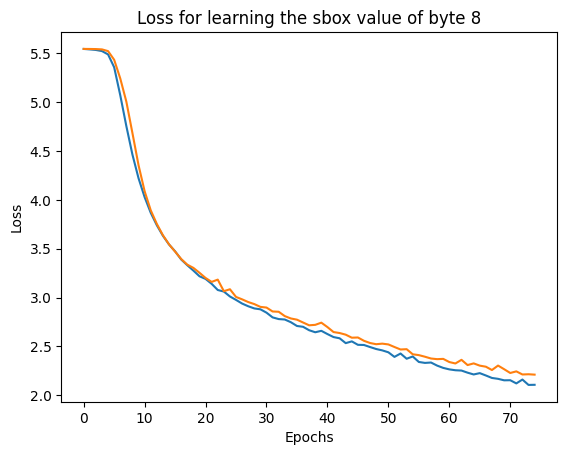

 56%|█████▋    | 9/16 [02:21<01:50, 15.82s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0045 - loss: 5.5453 - val_accuracy: 0.0020 - val_loss: 5.5449
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0070 - loss: 5.5411 - val_accuracy: 0.0030 - val_loss: 5.5449
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0105 - loss: 5.5360 - val_accuracy: 0.0091 - val_loss: 5.5445
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0123 - loss: 5.5262 - val_accuracy: 0.0071 - val_loss: 5.5419
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0149 - loss: 5.4983 - val_accuracy: 0.0071 - val_loss: 5.5273
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0144 - loss: 5.3934 - val_accuracy: 0.0091 - val_loss: 5.4569
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0163 - loss: 5.1392 - val_accuracy: 0.0182 - val_loss: 5.2757
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0297 - loss: 4.8378 - val_accuracy: 0.0354 - val_loss:

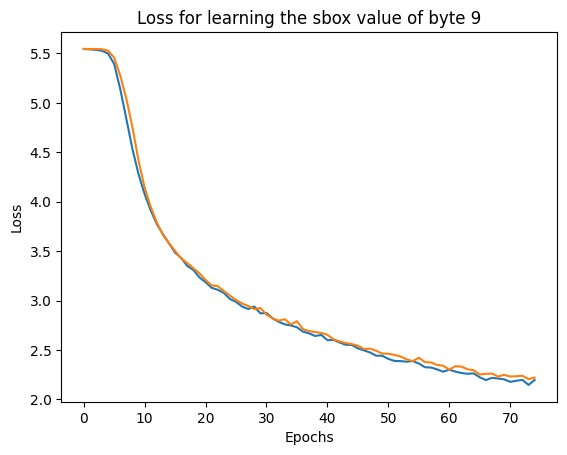

 62%|██████▎   | 10/16 [02:37<01:35, 15.87s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0044 - loss: 5.5451 - val_accuracy: 0.0040 - val_loss: 5.5451
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0049 - loss: 5.5405 - val_accuracy: 0.0040 - val_loss: 5.5448
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0065 - loss: 5.5347 - val_accuracy: 0.0040 - val_loss: 5.5443
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0089 - loss: 5.5227 - val_accuracy: 0.0040 - val_loss: 5.5420
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0126 - loss: 5.4856 - val_accuracy: 0.0071 - val_loss: 5.5321
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0139 - loss: 5.3718 - val_accuracy: 0.0162 - val_loss: 5.4500
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0155 - loss: 5.1237 - val_accuracy: 0.0232 - val_loss: 5.2473
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0287 - loss: 4.8389 - val_accuracy: 0.0202 - val_loss:

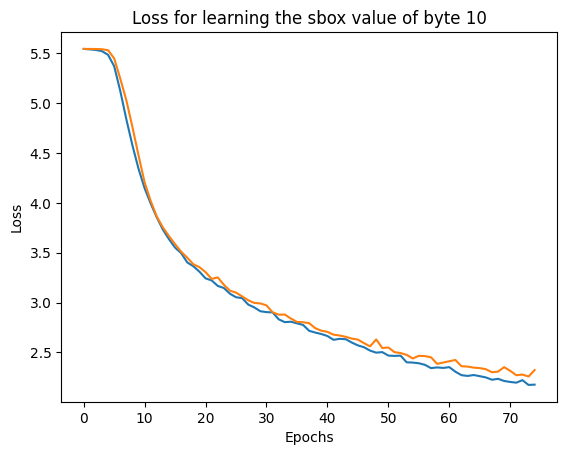

 69%|██████▉   | 11/16 [02:53<01:19, 15.96s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0038 - loss: 5.5451 - val_accuracy: 0.0010 - val_loss: 5.5458
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0051 - loss: 5.5407 - val_accuracy: 0.0020 - val_loss: 5.5453
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0067 - loss: 5.5349 - val_accuracy: 0.0030 - val_loss: 5.5443
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0119 - loss: 5.5231 - val_accuracy: 0.0040 - val_loss: 5.5404
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0146 - loss: 5.4860 - val_accuracy: 0.0051 - val_loss: 5.5208
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0134 - loss: 5.3416 - val_accuracy: 0.0091 - val_loss: 5.4286
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0163 - loss: 5.0532 - val_accuracy: 0.0283 - val_loss: 5.2209
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0327 - loss: 4.7558 - val_accuracy: 0.0222 - val_loss:

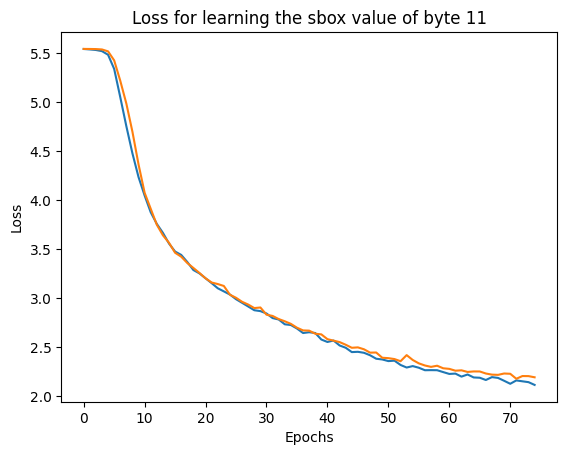

 75%|███████▌  | 12/16 [03:09<01:03, 15.83s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0037 - loss: 5.5445 - val_accuracy: 0.0010 - val_loss: 5.5453
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0062 - loss: 5.5399 - val_accuracy: 0.0010 - val_loss: 5.5447
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0085 - loss: 5.5339 - val_accuracy: 0.0010 - val_loss: 5.5437
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0128 - loss: 5.5222 - val_accuracy: 0.0091 - val_loss: 5.5398
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0174 - loss: 5.4877 - val_accuracy: 0.0131 - val_loss: 5.5195
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0186 - loss: 5.3601 - val_accuracy: 0.0172 - val_loss: 5.4344
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0218 - loss: 5.0784 - val_accuracy: 0.0293 - val_loss: 5.2413
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0393 - loss: 4.7464 - val_accuracy: 0.0303 - val_loss:

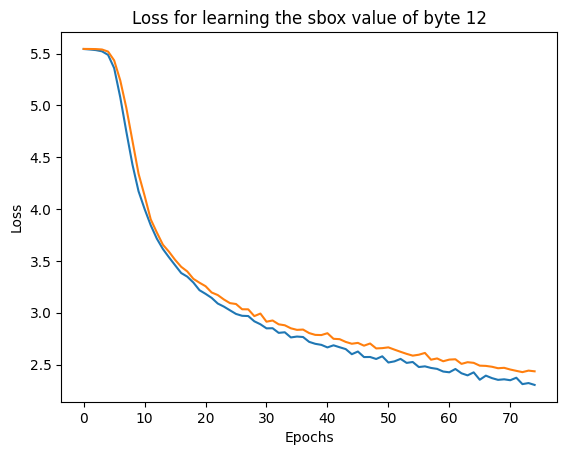

 81%|████████▏ | 13/16 [03:24<00:46, 15.65s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0048 - loss: 5.5452 - val_accuracy: 0.0040 - val_loss: 5.5465
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0062 - loss: 5.5408 - val_accuracy: 0.0040 - val_loss: 5.5462
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0072 - loss: 5.5361 - val_accuracy: 0.0040 - val_loss: 5.5461
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0109 - loss: 5.5282 - val_accuracy: 0.0030 - val_loss: 5.5451
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0148 - loss: 5.5110 - val_accuracy: 0.0081 - val_loss: 5.5400
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0177 - loss: 5.4561 - val_accuracy: 0.0071 - val_loss: 5.5063
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0215 - loss: 5.2750 - val_accuracy: 0.0152 - val_loss: 5.3698
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0299 - loss: 4.9838 - val_accuracy: 0.0162 - val_loss:

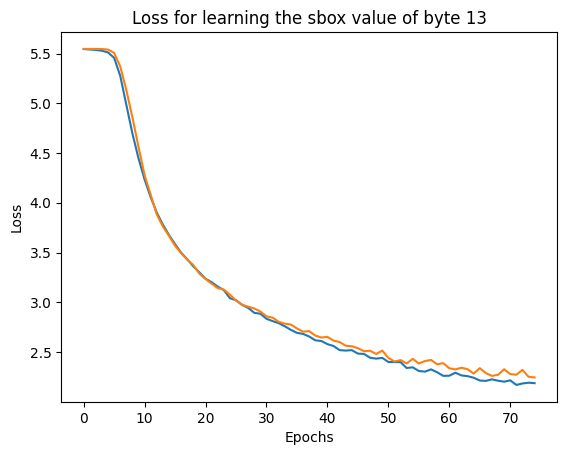

 88%|████████▊ | 14/16 [03:39<00:31, 15.56s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0046 - loss: 5.5451 - val_accuracy: 0.0040 - val_loss: 5.5454
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0055 - loss: 5.5403 - val_accuracy: 0.0040 - val_loss: 5.5454
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0062 - loss: 5.5324 - val_accuracy: 0.0051 - val_loss: 5.5444
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 5.5097 - val_accuracy: 0.0040 - val_loss: 5.5395
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0101 - loss: 5.4235 - val_accuracy: 0.0061 - val_loss: 5.5008
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0125 - loss: 5.1903 - val_accuracy: 0.0131 - val_loss: 5.3603
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0224 - loss: 4.9116 - val_accuracy: 0.0071 - val_loss: 5.2064
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0300 - loss: 4.6917 - val_accuracy: 0.0141 - val_loss:

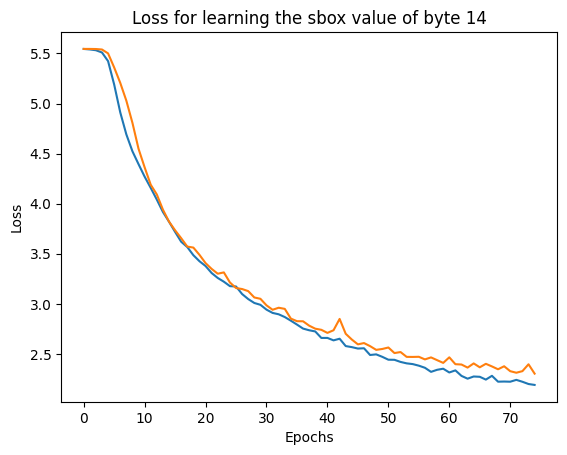

 94%|█████████▍| 15/16 [03:55<00:15, 15.51s/it]

Epoch 1/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0054 - loss: 5.5448 - val_accuracy: 0.0040 - val_loss: 5.5460
Epoch 2/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0072 - loss: 5.5400 - val_accuracy: 0.0061 - val_loss: 5.5455
Epoch 3/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0093 - loss: 5.5337 - val_accuracy: 0.0071 - val_loss: 5.5443
Epoch 4/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0118 - loss: 5.5209 - val_accuracy: 0.0121 - val_loss: 5.5406
Epoch 5/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0137 - loss: 5.4834 - val_accuracy: 0.0131 - val_loss: 5.5216
Epoch 6/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0173 - loss: 5.3551 - val_accuracy: 0.0172 - val_loss: 5.4418
Epoch 7/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0193 - loss: 5.0934 - val_accuracy: 0.0242 - val_loss: 5.2543
Epoch 8/75
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0322 - loss: 4.8367 - val_accuracy: 0.0232 - val_loss:

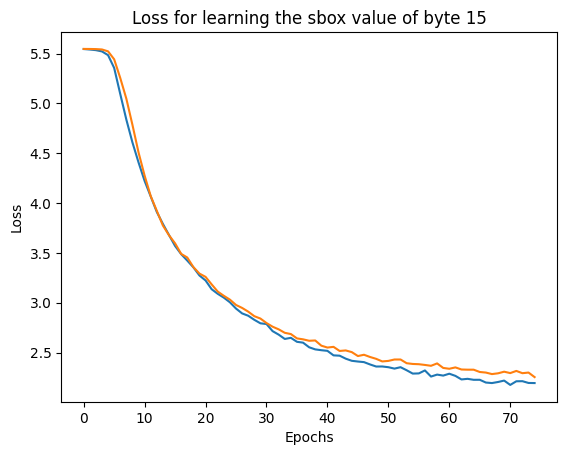

100%|██████████| 16/16 [04:11<00:00, 15.69s/it]


In [7]:
for byte in trange(0, 16):
    model = build_mlp()
    one_hot_encoding_labels = to_categorical(labels[:, byte], 256)
    history = model.fit(x=traces, y=one_hot_encoding_labels, batch_size=128, verbose = 1, validation_split=0.1, epochs=75)

    ### Save trained model to disk
    model.save("./models/model_byte_{}.keras".format(byte))

    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss for learning the sbox value of byte {}".format(byte))
    plt.show()